# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hilmi Datu Allam
- **Email:** hilmi.allam@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Jam berapa penyewaan sepeda paling banyak dan sedikit pada hari libur dan hari kerja ?
- Bagaimana perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja ?
- Apakah musim mempengaruhi jumlah penyewa ? 
- Apakah suhu mempengaruhi jumlah penyewa sepeda ? 
- Bagaimana performa penyewaan beberapa bulan terakhir ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#Import semua library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
#Memperindah visual dengan ignore futurewarning
warnings.simplefilter(action="ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

In [2]:
#Membaca data hour.csv dari folder data
dataset_hour=pd.read_csv("data/hour.csv")
#Memperlihatkan beberapa baris pertama data
print(dataset_hour.shape)
dataset_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Membaca data day.csv dari folder data
dataset_day=pd.read_csv("data/day.csv")
#Memperlihatkan beberapa baris pertama data
print(dataset_day.shape)
dataset_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset hour memiliki 17379 baris dan 17 kolom
- Dataset day memiliki 731 baris dan 16 kolom (tidak ada kolom hr atau hour)

### Assessing Data

Assessing dataset_hour

In [4]:
#Memeriksa tipe data tiap kolom
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#Memeriksa rangkuman statistk
dataset_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Cek duplikat
jumlahDuplikat = dataset_hour.duplicated().sum()
print(f"Jumlah data duplikat: {jumlahDuplikat}")

Jumlah data duplikat: 0


In [7]:
#Cek null 
dataset_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Cek na
dataset_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Pada kolom dteday memiliki Dtype object maka perlu diubah menjadi datetime
- Pada dataset hour tidak terdapat missing value (null atau NaN) dan data duplicate pada tiap kolom

Assessing dataset_day

In [9]:
#Memeriksa tipe data tiap kolom
dataset_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
#Memeriksa rangkuman statistk
dataset_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Cek duplikat
jumlahDuplikat = dataset_day.duplicated().sum()
print(f"Jumlah data duplikat: {jumlahDuplikat}")

Jumlah data duplikat: 0


In [12]:
#Cek null 
dataset_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
#Cek na
dataset_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Pada kolom dteday memiliki Dtype object maka perlu diubah menjadi datetime
- Pada dataset day tidak terdapat missing value (null atau NaN) dan data duplicate pada tiap kolom
- Pada tahap selanjutnya akan dirubah nama kolom agar lebih mudah dibaca 
- Mengganti tipe data menjadi kategori pada season, hour, month, holiday, weekday, weather karena data pada kolom-kolom ini berkelompok
- Dropping pada kolom yang tidak digunakan seperti instant 
- Melakukan metode binning pada kolom temp

### Cleaning Data

Membersihkan dataset_hour

In [14]:
#Dropping kolom instant
dataset_hour = dataset_hour.drop("instant", axis=1)

In [15]:
#Memperjelas informasi pada data dengan merubah nama kolom
dataset_hour.rename(
    columns={
        "dteday":"date",
        "yr": "year",
        "hr": "hour",
        "mnth": "month",
        "weekday": "day_of_the_week",
        "weathersit": "weather",
        "windspeed": "wind_speed",
        "cnt": "count_rental",
        "atemp":"feel_temp",
        "hum": "humidity",
    },
    inplace=True,
)

In [16]:
#Merubah tipe data int menjadi category
columns = ['season','hour','month', 'holiday', 'day_of_the_week', 'weather',"workingday"]
 
for column in columns:
    dataset_hour[column] =  dataset_hour[column].astype("category")

In [17]:
#Merubah tipe data date yang semula object menjadi datetime
dataset_hour['date'] = pd.to_datetime(dataset_hour['date'])

In [18]:
#Mengganti isi kolom menjadi lebih mudah dibaca

#Mengganti value numerik bulan menjadi nama bulan
dataset_hour["month"] = dataset_hour["month"].cat.rename_categories({
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
})

#Mengganti 0 menjadi 2011 dan 1 menjadi 2012
dataset_hour["year"]=dataset_hour["year"].replace(
    [0,1], 
    ['2011','2012']
    
)

#Mengganti value numerik menjadi nama hari
dataset_hour["day_of_the_week"] = dataset_hour["day_of_the_week"].cat.rename_categories({
    0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"
})

#Mengganti value numerik menjadi nama musim pada kolom season
dataset_hour["season"] = dataset_hour["season"].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})


#Mengganti value numerik pada weather menjadi ringkasan cuaca
dataset_hour["weather"] = dataset_hour["weather"].cat.rename_categories({
    1: "Clear", 2: "Cloudy_Misty", 3: "Light_rain_snow", 4: "Heavy_rain_snow"
})

#Mengganti value numerik pada workingday menjadi workday atau holiday
dataset_hour["workingday"] = dataset_hour["workingday"].cat.rename_categories({
    0: "Workday", 1: "Holiday"
})



In [19]:
# Merubah nilai temperature, feeling temperature dan humidity menjadi value aslinya
dataset_hour['temp'] = dataset_hour['temp']*41
dataset_hour['feel_temp'] = dataset_hour['feel_temp']*41
dataset_hour['humidity'] = dataset_hour['humidity']*100

In [20]:
# Categorize Temperature
def categorize_temp(temp):
    if temp < 15:
        return "Dingin"
    elif temp <= 25:
        return "Sedang"
    else:
        return "Hangat"

# Apply to dataset
dataset_hour["temp"] = dataset_hour["temp"].apply(categorize_temp)


# Ubah kolom temp_humidity_category menjadi tipe kategori
dataset_hour["temp"] = dataset_hour["temp"].astype("category")


In [21]:
dataset_hour.describe(include="all")

,date,season,year,month,hour,holiday,day_of_the_week,workingday,weather,temp,feel_temp,humidity,wind_speed,casual,registered,count_rental
count,17379,17379,17379,17379,17379.0,17379.0,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,24.0,2.0,7,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Juli,16.0,0.0,Sabtu,Holiday,Clear,Sedang,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,730.0,16879.0,2512,11865,11413,6103,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.506779,62.722884,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.665300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.876800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.469200,78.000000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,100.000000,0.850700,367.000000,886.000000,977.000000


Membersihkan dataset_day

In [22]:
#Dropping kolom instant
dataset_day = dataset_day.drop("instant", axis=1)

In [23]:
#Memperjelas informasi pada data dengan merubah nama kolom
dataset_day.rename(
    columns={
        "dteday":"date",
        "yr": "year",
        "hr": "hour",
        "mnth": "month",
        "weekday": "day_of_the_week",
        "weathersit": "weather",
        "windspeed": "wind_speed",
        "cnt": "count_rental",
        "atemp":"feel_temp",
        "hum": "humidity",
    },
    inplace=True,
)

In [24]:
#Merubah tipe data int menjadi category
columns = ['season','month', 'holiday', 'day_of_the_week', 'weather',"workingday"]
 
for column in columns:
    dataset_day[column] =  dataset_day[column].astype("category")

In [25]:
#Merubah tipe data date yang semula object menjadi datetime
dataset_day['date'] = pd.to_datetime(dataset_day['date'])

In [26]:
#Mengganti isi kolom menjadi lebih mudah dibaca

#Mengganti value numerik bulan menjadi nama bulan
dataset_day["month"] = dataset_day["month"].cat.rename_categories({
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April", 5: "Mei", 6: "Juni",
    7: "Juli", 8: "Agustus", 9: "September", 10: "Oktober", 11: "November", 12: "Desember"
})

#Mengganti 0 menjadi 2011 dan 1 menjadi 2012
dataset_day["year"]=dataset_day["year"].replace(
    [0,1], 
    ['2011','2012']
    
)

#Mengganti value numerik menjadi nama hari
dataset_day["day_of_the_week"] = dataset_day["day_of_the_week"].cat.rename_categories({
    0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"
})

#Mengganti value numerik menjadi nama musim pada kolom season
dataset_day["season"] = dataset_day["season"].cat.rename_categories({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})


#Mengganti value numerik pada weather menjadi ringkasan cuaca
dataset_day["weather"] = dataset_day["weather"].cat.rename_categories({
    1: "Clear", 2: "Cloudy_Misty", 3: "Light_rain_snow", 4: "Heavy_rain_snow"
})

#Mengganti value numerik pada workingday menjadi workday atau holiday
dataset_day["workingday"] = dataset_day["workingday"].cat.rename_categories({
    0: "Workday", 1: "Holiday"
})



In [27]:
# Merubah nilai temperature, feeling temperature dan humidity menjadi value aslinya
dataset_day['temp'] = dataset_day['temp']*41
dataset_day['feel_temp'] = dataset_day['feel_temp']*41
dataset_day['humidity'] = dataset_day['humidity']*100

In [28]:
dataset_day.describe(include="all")

,date,season,year,month,holiday,day_of_the_week,workingday,weather,temp,feel_temp,humidity,wind_speed,casual,registered,count_rental
count,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Januari,0.0,Minggu,Holiday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,19.448514,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.241854,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,13.851543,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,19.956053,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,24.952682,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,34.476736,97.250000,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Kita sudah melakukan semua langkah yang kita rencanakan
- Pada kolom dteday memiliki Dtype object maka perlu diubah menjadi datetime
- Pada tahap selanjutnya akan dirubah nama kolom agar lebih mudah dibaca 
- Mengganti tipe data menjadi kategori pada season, mnth, holiday, weekday, weather karena data pada kolom-kolom ini berkelompok
- Dropping pada kolom yang tidak digunakan seperti instant 
- Merubah value kolom temp menggunakan metode binning

## Exploratory Data Analysis (EDA)

### Explore dataset_hour

In [29]:
# Total penyewaan casual dan registered berdasarkan workingday dan jam 
dataset_hour.groupby(by=["workingday","hour"], observed=False).agg({
    "count_rental": ["sum"]
})


count_rental
                         sum
workingday hour             
Workday    0           20884
           1           15987
           2           12123
           3            5851
           4            1876
           5            1929
           6            4292
           7           10027
           8           24406
           9           39645
           10          59115
           11          72838
           12          84606
           13          86101
           14          84233
           15          82886
           16          81480
           17          74740
           18          64643
           19          53285
           20          40190
           21          32674
           22          26694
           23          19764
Holiday    0           18246
           1            8177
           2            4229
           3            2323
           4            2552
           5           12332
           6           50840
           7          144144
           8          236595
           9          119793
           10          67142
           11          78482
           12          99808
           13          98818
           14          91419
           15         100263
           16         146268
           17         262120
           18         245129
           19         173504
           20         124360
           21          92771
           22          68918
           23          44177

Dari Tabel diatas dapat dilihat pada hari libur jumlah penyewa paling banyak terdapat pada jam 17.00 dan jumlah penyewa paling sedikit terdapat pada jam 03.00. Sedangkan pada hari kerja jumlah penyewa paling banyak terdapat pada jam 13.00 dan jumlah penyewa paling sedikit terdapat pada jam 04.00

Explore dataset_day

In [30]:
# Total penyewaan berdasarkan working day
dataset_hour.groupby(by=["year","workingday"], observed=False).agg({
    "count_rental": ["sum"]
})


count_rental
                         sum
year workingday             
2011 Workday          386839
     Holiday          856264
2012 Workday          613430
     Holiday         1436146

**Insight:**
Dari tabel diatas dapat dilihat jumlah penyewa pada hari libur jauh lebih banyak dari hari kerja. Jumlahnya melebihi dua kali lipat penyewa pada hari kerja.

In [31]:
# Total penyewaan casual dan registered berdasarkan musim
dataset_hour.groupby(by=["season"], observed=False).agg({
    "count_rental": ["sum"],
}).sort_values(by=("count_rental", "sum"), ascending=False)

,count_rental
,sum
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


**Insight:**
Dari tabel diatas dapat dilihat musim gugur memiliki penyewa paling banyak

In [32]:
# Total penyewaan berdasarkan suhu
dataset_hour.groupby(by=["temp"], observed=False).agg({
    "count_rental": ["sum"],
})

,count_rental
,sum
temp,
Dingin,564997
Hangat,1567654
Sedang,1160028


**Insight:**
Dari tabel diatas dapat dilihat terdapat jumlah penyewa sepeda pada suhu yang lebih hangat jauh melebihi suhu dingin

In [33]:
# Total penyewaan casual berdasarkan bulan dan tahun
dataset_hour.groupby(by=["year","month"], observed=False).agg({
    "count_rental": ["sum"],
})

count_rental
                        sum
year month                 
2011 Januari          38189
     Februari         48215
     Maret            64045
     April            94870
     Mei             135821
     Juni            143512
     Juli            141341
     Agustus         136691
     September       127418
     Oktober         123511
     November        102167
     Desember         87323
2012 Januari          96744
     Februari        103137
     Maret           164875
     April           174224
     Mei             195865
     Juni            202830
     Juli            203607
     Agustus         214503
     September       218573
     Oktober         198841
     November        152664
     Desember        123713

**Insight:**
Dari tabel diatas dapat dilihat terdapat penurunan pada bulan november dan desember.

## Visualization & Explanatory Analysis

- Jam berapa penyewaan sepeda paling banyak dan sedikit pada hari libur dan hari kerja ?
- Bagaimana perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja ?
- Apakah musim mempengaruhi jumlah penyewa ? 
- Apakah suhu mempengaruhi jumlah penyewa sepeda ? 
- Bagaimana performa penyewaan beberapa bulan terakhir ?

### Pertanyaan 1: Jam berapa penyewaan sepeda paling banyak dan sedikit pada hari libur dan hari kerja ?

C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\3753188234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = dataset_hour.groupby(["workingday", "hour"]).agg({"count_rental": "sum"}).reset_index()
C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\3753188234.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count_rental", data=top_hours_workday,
C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\3753188234.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count_r

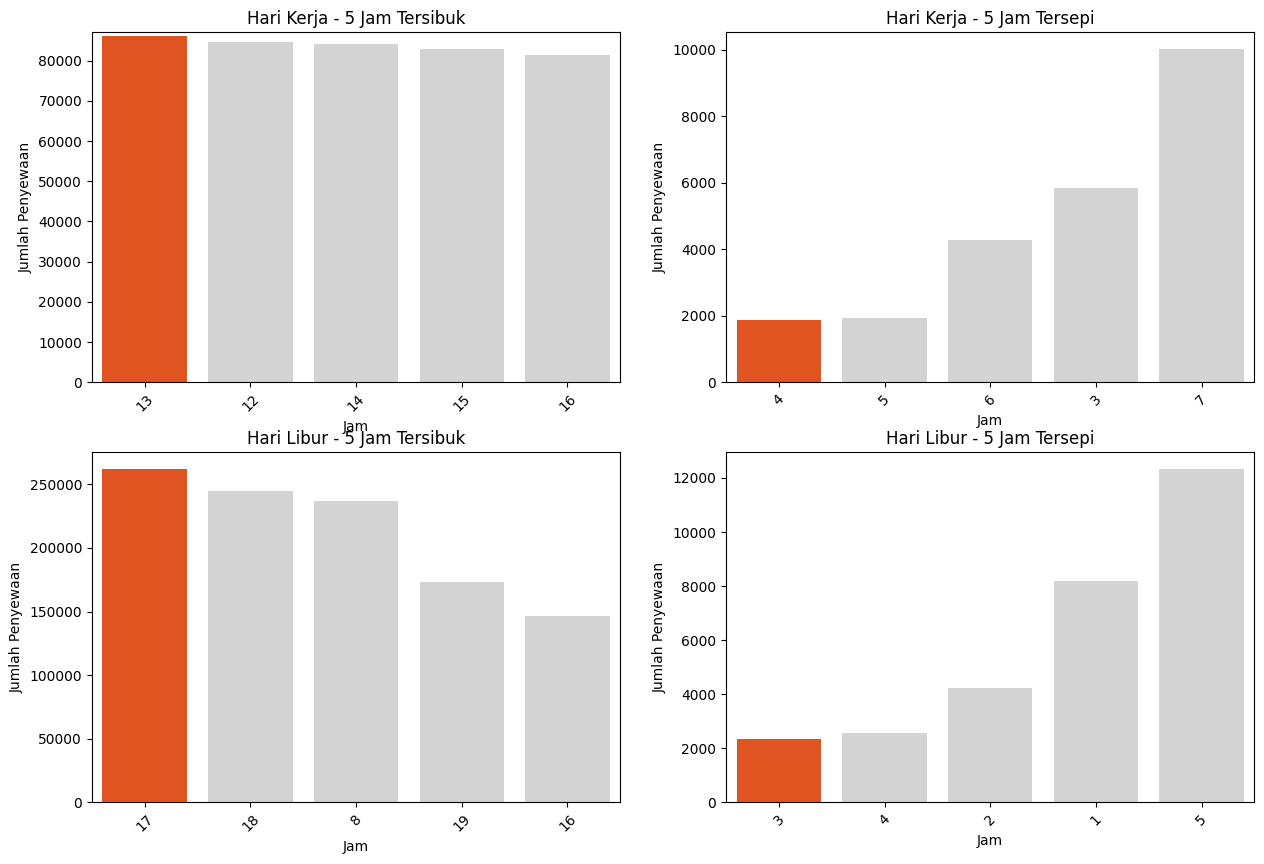

In [34]:
# Buat pivot table untuk menghitung jumlah penyewaan berdasarkan hari kerja dan jam
df = dataset_hour.groupby(["workingday", "hour"]).agg({"count_rental": "sum"}).reset_index()

# Ubah tipe data 'hour' menjadi string agar tampilan bar plot lebih rapi
df["hour"] = df["hour"].astype(str)

# Buat pivot table untuk menghitung jumlah penyewaan berdasarkan hari kerja dan jam

top_hours_workday = df[df["workingday"] == "Workday"].nlargest(5, "count_rental")
bottom_hours_workday = df[df["workingday"] == "Workday"].nsmallest(5, "count_rental")
top_hours_holiday = df[df["workingday"] == "Holiday"].nlargest(5, "count_rental")
bottom_hours_holiday = df[df["workingday"] == "Holiday"].nsmallest(5, "count_rental")

# Buat subplot dengan ukuran 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Grafik 1: 5 jam dengan penyewaan tertinggi pada hari kerja
sns.barplot(x="hour", y="count_rental", data=top_hours_workday,  
            palette=["#FF4500", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=axes[0, 0])

# Atur skala sumbu y agar lebih dinamis
min_y, max_y = top_hours_workday["count_rental"].min(), top_hours_workday["count_rental"].max()
axes[0, 0].set_ylim(0, max_y + (max_y - min_y) * 0.2)

# Atur label dan judul
axes[0, 0].set_xticks(top_hours_workday["hour"])  
axes[0, 0].set_title("Hari Kerja - 5 Jam Tersibuk")
axes[0, 0].set_xlabel("Jam")
axes[0, 0].set_ylabel("Jumlah Penyewaan")
axes[0, 0].tick_params(axis='x', rotation=45)

# Grafik 2: 5 jam dengan penyewaan terendah pada hari kerja
sns.barplot(x="hour", y="count_rental", data=bottom_hours_workday,  
            palette=["#FF4500", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=axes[0, 1])

axes[0, 1].set_title("Hari Kerja - 5 Jam Tersepi")
axes[0, 1].set_xlabel("Jam")
axes[0, 1].set_ylabel("Jumlah Penyewaan")
axes[0, 1].tick_params(axis='x', rotation=45)

# Grafik 3: 5 jam dengan penyewaan tertinggi pada hari libur
sns.barplot(x="hour", y="count_rental", data=top_hours_holiday,  
            palette=["#FF4500", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=axes[1, 0])

axes[1, 0].set_title("Hari Libur - 5 Jam Tersibuk")
axes[1, 0].set_xlabel("Jam")
axes[1, 0].set_ylabel("Jumlah Penyewaan")
axes[1, 0].tick_params(axis='x', rotation=45)

# Grafik 4: 5 jam dengan penyewaan terendah pada hari libur
sns.barplot(x="hour", y="count_rental", data=bottom_hours_holiday,  
            palette=["#FF4500", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=axes[1, 1])

axes[1, 1].set_title("Hari Libur - 5 Jam Tersepi")
axes[1, 1].set_xlabel("Jam")
axes[1, 1].set_ylabel("Jumlah Penyewaan")
axes[1, 1].tick_params(axis='x', rotation=45)

# Menyesuaikan tata letak plot agar lebih rapi

plt.show()


Berdasarkan gambar di atas, dapat dilihat bahwa pada hari kerja penyewaan sepeda paling banyak pada jam 13:00 sekitar 86101 penyewaan dan penyewaan sepeda paling sedikit pada jam 04.00 sekitar 1876 penyewaan. Sedangkan pada hari libur penyewaan sepeda paling banyak pada jam 17:00 sekitar 262120 penyewaan dan penyewaan sepeda paling sedikit pada jam 03.00 sekitar 2323 penyewaan

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja ?

C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\4155489153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = dataset_day.groupby("workingday")[["count_rental"]].sum()


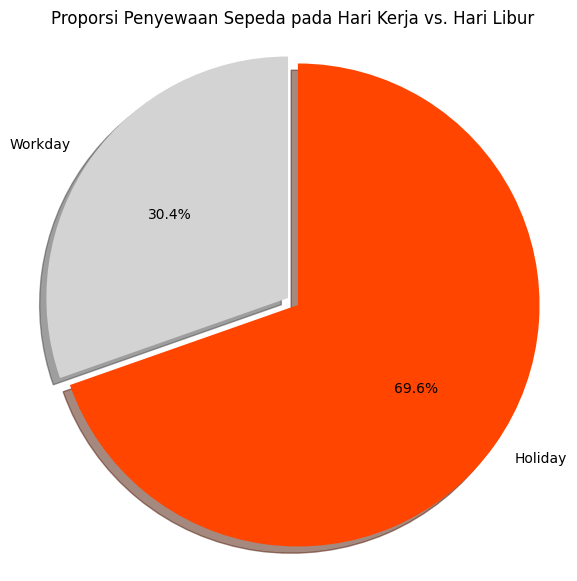

In [35]:
# Mengelompokkan data berdasarkan hari kerja dan menghitung total penyewaan
df = dataset_day.groupby("workingday")[["count_rental"]].sum()

# Menyiapkan label dan ukuran secara dinamis
labels = df.index  # ["Workday", "Holiday"]
sizes = df["count_rental"]  # Total penyewaan untuk setiap kategori

# Memberikan efek pemisahan pada salah satu bagian
explode = (0, 0.05)

# Membuat figure dan pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=["#D3D3D3", "#FF4500"], 
    shadow=True, 
    startangle=90
)

# Menjaga bentuk pie chart agar tetap bulat
ax.axis('equal')

# Menambahkan judul
plt.title("Proporsi Penyewaan Sepeda pada Hari Kerja vs. Hari Libur")

# Menampilkan plot
plt.show()


Berdasarkan pie chart diatas pada jumlah penyewa sepeda pada hari libur jauh pada hari kerja. Pada hari libur penyewa sepeda memiliki 69.6% sedangkan pada hari kerja hanya 30.4%

### Pertanyaan 3: Musim mana yang memiliki penyewaan sepeda paling banyak? 

C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\4184902566.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\4184902566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


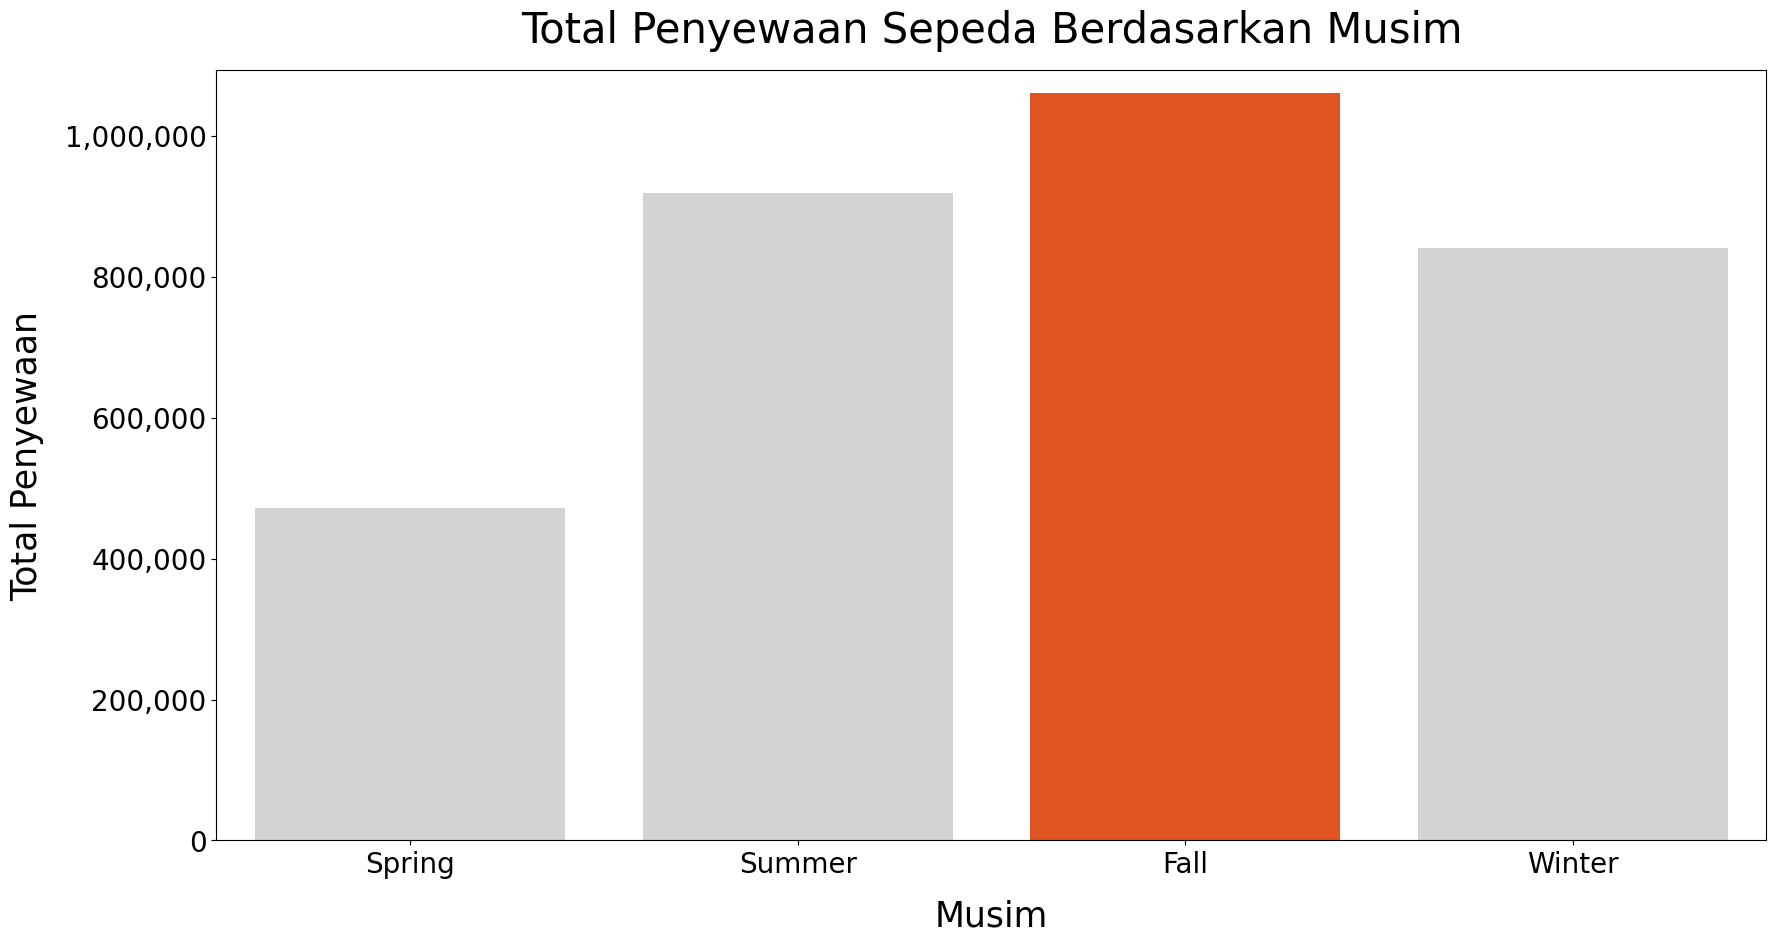

In [36]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
df = dataset_day.groupby("season", observed=False)["count_rental"].sum().reset_index()

# Menentukan nilai maksimum untuk sumbu Y
max_rental = df["count_rental"].max()

# Membuat figure dan barplot
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    x="season", 
    y="count_rental", 
    data=df, 
    palette=["#D3D3D3", "#D3D3D3", "#FF4500", "#D3D3D3"], 
    ci=None
)

# Menyesuaikan batas sumbu Y agar lebih proporsional
plt.ylim(0, max_rental * 1.03)

# Mengatur format angka pada sumbu Y agar lebih mudah dibaca
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Menambahkan label dan judul
plt.xlabel("Musim", fontsize=25, labelpad=15)
plt.ylabel("Total Penyewaan", fontsize=25, labelpad=15)
plt.title("Total Penyewaan Sepeda Berdasarkan Musim", fontsize=30, pad=20)

# Menyesuaikan ukuran label sumbu
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.show()


Berdasarkan barplot diatas dapat dilihat penyewaan sepeda paling banyak terdapat di musim gugur atau Fall.

### Pertanyaan 4: Apakah suhu mempengaruhi jumlah penyewa sepeda ?

C:\Users\hilmi\AppData\Local\Temp\ipykernel_85428\383348712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="temp", y="count_rental", data=dataset_suhu, palette=["#ADD8E6", "#fff082", "#eb9234"], ax=ax)


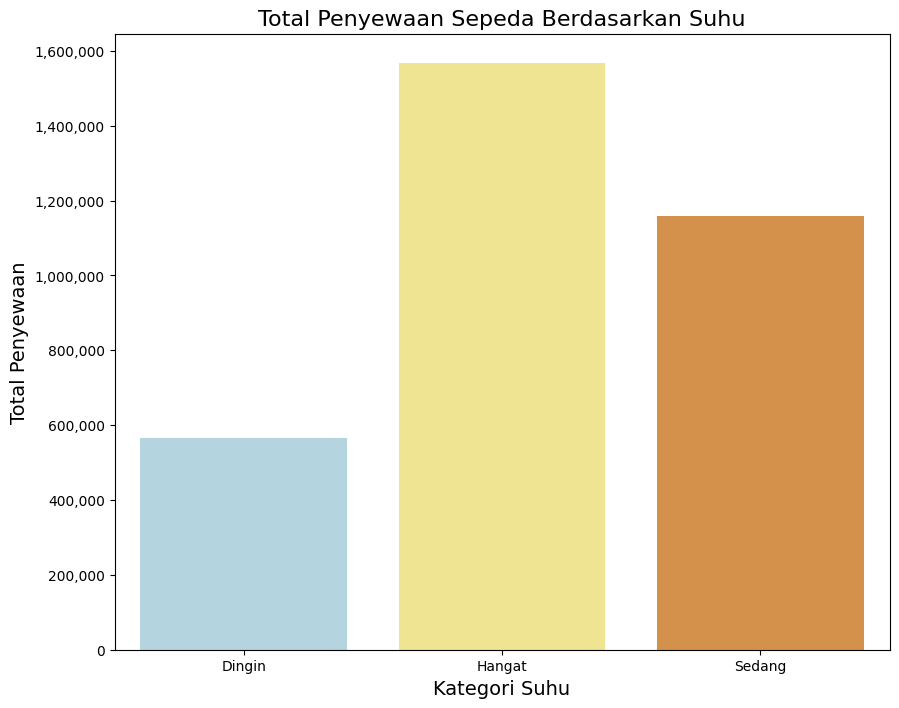

In [37]:
# Mengelompokkan data berdasarkan suhu dan menghitung total penyewaan
dataset_suhu = dataset_hour.groupby(by=["temp"], observed=False).agg({
    "count_rental": ["sum"],
}).reset_index()
dataset_suhu.columns = ["temp", "count_rental"]

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="temp", y="count_rental", data=dataset_suhu, palette=["#ADD8E6", "#fff082", "#eb9234"], ax=ax)

# Mengatur format angka pada sumbu Y agar lebih mudah dibaca (dengan pemisah ribuan)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Menambahkan label dan judul
plt.xlabel("Kategori Suhu", fontsize=14)
plt.ylabel("Total Penyewaan", fontsize=14)
plt.title("Total Penyewaan Sepeda Berdasarkan Suhu", fontsize=16)

# Menampilkan plot
plt.show()


Berdasarkan barplot diatas suhu hangat memiliki jumlah penyewa sepeda paling banyak dan diikuti dengan suhu sedang. Sedangkan suhu dingin memiliki jumlah penyewa yang paling sedikit.

In [38]:
dataset_hour.to_csv("dataset_hour_clean.csv")

### Pertanyaan 5: Bagaimana performa penyewaan beberapa bulan terakhir ?

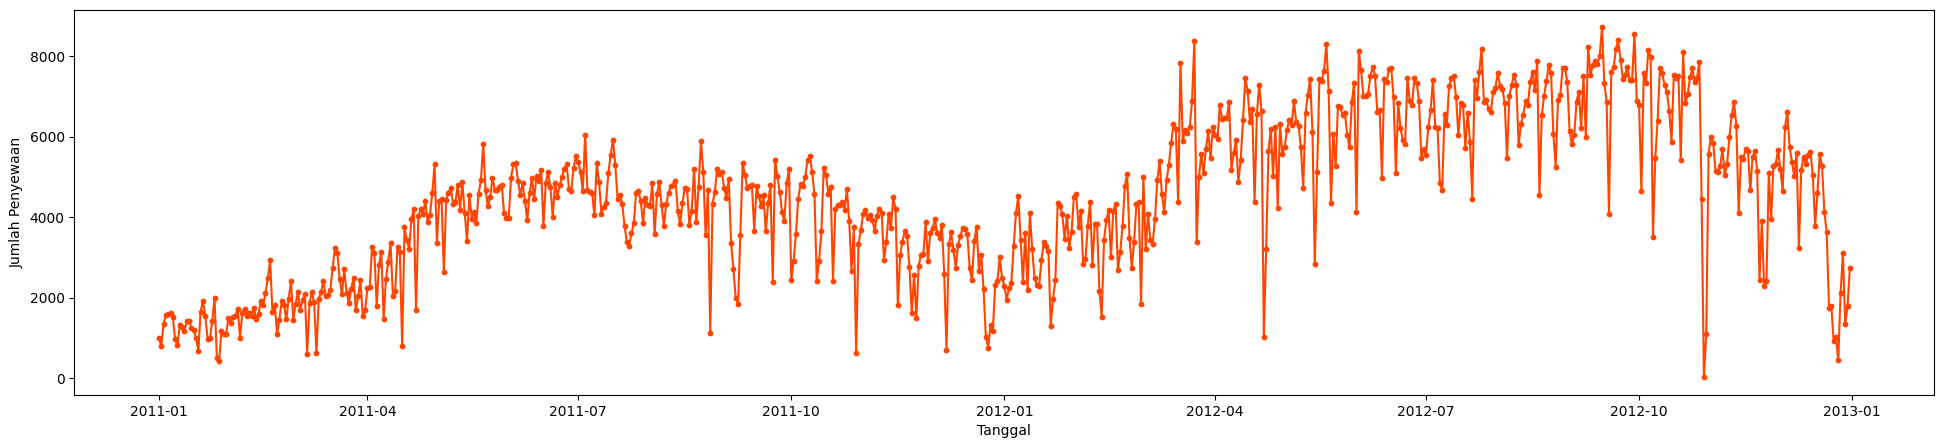

In [39]:
# Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# Menghitung jumlah penyewaan maksimum per hari
df = dataset_day.groupby("date")["count_rental"].max()

# Membuat scatter plot dan line plot dengan warna oranye kemerahan
plt.scatter(df.index, df.values, c="#FF4500", s=10, marker='o', label="Maksimum Harian")
plt.plot(df.index, df.values, color="#FF4500")

# Menambahkan label dan judul
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")

# Menampilkan plot
plt.show()


Berdasarkan line chart di atas, dapat disimpulkan bahwa jumlah penyewa sepeda terbanyak terjadi pada bulan September 2012. Namun menurun pada bulan November dan Mei

In [40]:
dataset_day.to_csv('dataset_day_clean.csv')

## Conclusion

- Jam berapa penyewaan sepeda paling banyak dan sedikit pada hari libur dan hari kerja ?
- Bagaimana perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja ?
- Apakah musim mempengaruhi jumlah penyewa ? 
- Apakah suhu mempengaruhi jumlah penyewa sepeda ? 
- Bagaimana performa penyewaan beberapa bulan terakhir ?

- Conclusion pertanyaan 1: pada hari kerja penyewaan sepeda paling banyak pada jam 13:00 dan paling sedikit pada jam 04.00. Sedangkan pada hari libur penyewaan sepeda paling banyak pada jam 17:00 dan paling sedikit pada jam 03.00.
- Conclusion pertanyaan 2: Berdasarkan pie chart diatas pada jumlah penyewa sepeda pada hari libur jauh pada hari kerja. Pada hari libur penyewa sepeda memiliki 69.6% sedangkan pada hari kerja hanya 30.4%
- Conclusion pertanyaan 3: penyewaan sepeda paling banyak terdapat di musim gugur atau Fall.
- Conclusion pertanyaan 4: Ya, suhu mempengaruhi jumlah penyewa sepeda dengan suhu hangat mempunyai jumlah penyewa sepeda paling banyak diikuti dengan sedang kemudian dingin.
- Conclusion pertanyaan 5: jumlah penyewa sepeda terbanyak terjadi pada bulan September 2012. Namun menurun pada bulan November dan Mei

## Analisis Lanjutan 

**Analisis Clustering**

**Total Penyewa Sepeda berdasarkan suhu**

In [41]:
# Total penyewaan casual dan registered berdasarkan tahun
dataset_hour.groupby(by=["temp"], observed=False).agg({
    "count_rental": ["sum"],
})

,count_rental
,sum
temp,
Dingin,564997
Hangat,1567654
Sedang,1160028


kita dapat menyimpulkan kelompok pengguna yang lebih cenderung menyewa sepeda pada hari dengan suhu yang hangat

**Total Penyewa Sepeda berdasarkan weather**

In [42]:
dataset_hour.groupby(by=["weather"], observed=False).agg({
    "count_rental": ["sum"],
})

,count_rental
,sum
weather,
Clear,2338173
Cloudy_Misty,795952
Light_rain_snow,158331
Heavy_rain_snow,223


kita dapat menyimpulkan kelompok pengguna yang lebih cenderung menyewa sepeda pada cuaca clear